**WELCOME!**

# Determines
In this project, predicted which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, there is two types of employee, one who stayed and another who left the company.

There is 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

# Plan

**1. Exploratory Data Analysis**
- Importing Modules
- Loading Dataset
- Data Insigts

**2. Data Visualization**
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

**3. Data Pre-Processing**
- Scaling
- Label Encoding

**4. Cluster Analysis**
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

**5. Model Building**
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

**6. Model Deployement**

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
# #Standard libraries for data analysis:

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from scipy.stats import norm, skew
# from scipy import stats
# # sklearn modules for data preprocessing:
# from sklearn.impute import SimpleImputer


# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split


# from sklearn.pipeline import Pipeline
# #sklearn modules for Model Selection:
# from sklearn import svm, tree, linear_model, neighbors
# from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# #sklearn modules for Model Evaluation & Improvement:
    
# from sklearn.metrics import confusion_matrix, accuracy_score 
# from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import KFold
# from sklearn import feature_selection
# from sklearn import model_selection
# from sklearn import metrics
# from sklearn.metrics import classification_report, precision_recall_curve
# from sklearn.metrics import auc, roc_auc_score, roc_curve
# from sklearn.metrics import make_scorer, recall_score, log_loss
# from sklearn.metrics import average_precision_score
# #Standard libraries for data visualization:
# import seaborn as sns
# from matplotlib import pyplot
# import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
# import matplotlib 
# %matplotlib inline
# color = sns.color_palette()
# import matplotlib.ticker as mtick
# from IPython.display import display
# pd.options.display.max_columns = None
# from pandas.plotting import scatter_matrix
# from sklearn.metrics import roc_curve
# #Miscellaneous Utilitiy Libraries:
# import random
# import os
# import re
# import sys
# import timeit
# import string
# import time
# from datetime import datetime
# from time import time
# from dateutil.parser import parse
# import joblib

# import warnings

# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

# plt.rcParams["figure.figsize"] = (10, 6)

# sns.set_style("whitegrid")
# pd.set_option('display.float_format', lambda x: '%.3f' % x)  # pd.options.display.float_format = '{:,.2f}'.format

# # Set it None to display all rows in the dataframe
# # pd.set_option('display.max_rows', None)
# # Set it to None to display all columns in the dataframe
# pd.set_option('display.max_columns', None)

# 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

## Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [ ]:
#df0 = pd.read_csv('/content/drive/MyDrive/HR_Dataset.csv')
df0 = pd.read_csv('HR_Dataset.csv')
df = df0.copy()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.380,0.530,2,157,3,0,1,0,sales,low
1,0.800,0.860,5,262,6,0,1,0,sales,medium
2,0.110,0.880,7,272,4,0,1,0,sales,medium
3,0.720,0.870,5,223,5,0,1,0,sales,low
4,0.370,0.520,2,159,3,0,1,0,sales,low


## Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Moreover, you can find the average of both the groups using groupby() and mean() function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.00,0.61,0.25,0.09,0.44,0.64,0.82,1.00
last_evaluation,14999.00,0.72,0.17,0.36,0.56,0.72,0.87,1.00
number_project,14999.00,3.80,1.23,2.00,3.00,4.00,5.00,7.00
average_montly_hours,14999.00,201.05,49.94,96.00,156.00,200.00,245.00,310.00
time_spend_company,14999.00,3.50,1.46,2.00,3.00,3.00,4.00,10.00
Work_accident,14999.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
left,14999.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00
promotion_last_5years,14999.00,0.02,0.14,0.00,0.00,0.00,0.00,1.00


In [ ]:
df.describe(include="O").T  # only the columns that, dtype object are.

,count,unique,top,freq
Departments,14999,10,sales,4140
salary,14999,3,low,7316


In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [ ]:
df.rename(columns={"Departments ": "departments", "Work_accident" : "work_accident"}, inplace =True)
df.head() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
duplicate_rows_df = df.duplicated().sum()
print("number of duplicated rows: ", duplicate_rows_df)

number of duplicated rows:  3008


In [ ]:
df[(df.satisfaction_level == 0.46) & (df.last_evaluation==0.570)& (df.average_montly_hours  == 152) ]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
586,0.46,0.57,2,152,3,0,1,0,support,low
12586,0.46,0.57,2,152,3,0,1,0,support,low
14797,0.46,0.57,2,152,3,0,1,0,support,low


In [ ]:
df = df.drop_duplicates()
df.head(5) # it is not possible, that all the employees are satisfied in their job at the same situations.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape


(11991, 10)

In [ ]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

In [ ]:
df=df.reset_index(drop=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


In [ ]:
df.groupby(["left"]).salary.value_counts(normalize=True) 
#relation between left and salary.

left  salary
0     low      0.46
      medium   0.45
      high     0.09
1     low      0.59
      medium   0.39
      high     0.02
Name: salary, dtype: float64

In [ ]:
df.groupby(["promotion_last_5years"]).left.value_counts(normalize=True)
#relation between promotion and left.

promotion_last_5years  left
0                      0      0.83
                       1      0.17
1                      0      0.96
                       1      0.04
Name: left, dtype: float64

In [ ]:
pd.pivot_table(df, values=['last_evaluation'], index=['salary'],
                     aggfunc={'last_evaluation': np.mean})
#average of last evaluation by salary

,last_evaluation
salary,
high,0.71
low,0.72
medium,0.72


In [ ]:
pd.pivot_table(df, values=['satisfaction_level'], index=['salary'],
                     aggfunc={'satisfaction_level': np.mean})
#average of satisfaction level by salary

,satisfaction_level
salary,
high,0.64
low,0.62
medium,0.63


In [ ]:
df.groupby(["work_accident"]).left.value_counts(normalize=True)
#relation between left and work accident.

work_accident  left
0              0      0.81
               1      0.19
1              0      0.94
               1      0.06
Name: left, dtype: float64

In [ ]:
df.departments.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df.departments.value_counts()
#number of employees in departments

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: departments, dtype: int64

In [ ]:
df.iloc[1500:1501].T
# a sample of a left employee

,1500
satisfaction_level,0.37
last_evaluation,0.46
number_project,2
average_montly_hours,157
time_spend_company,3
work_accident,0
left,1
promotion_last_5years,0
departments,support
salary,medium


In [ ]:
pivot_departments = pd.pivot_table(df, index=["departments", "salary"])
pivot_departments
# pivot table of data which is organized by departments and salary

average_montly_hours  last_evaluation  left  \
departments salary                                                
IT          high                  196.17             0.71  0.06   
            low                   199.57             0.72  0.18   
            medium                202.56             0.71  0.16   
RandD       high                  201.70             0.70  0.06   
            low                   199.28             0.72  0.16   
            medium                203.22             0.71  0.10   
accounting  high                  203.84             0.73  0.05   
            low                   201.29             0.72  0.20   
            medium                199.70             0.72  0.18   
hr          high                  211.71             0.75  0.08   
            low                   201.18             0.72  0.21   
            medium                195.61             0.70  0.18   
management  high                  199.46             0.72  0.01   
            low                   203.43             0.72  0.23   
            medium                201.53             0.74  0.11   
marketing   high                  189.95             0.68  0.05   
            low                   202.95             0.73  0.25   
            medium                197.88             0.72  0.11   
product_mng high                  195.96             0.67  0.08   
            low                   201.34             0.73  0.17   
            medium                196.54             0.71  0.16   
sales       high                  199.77             0.70  0.05   
            low                   199.47             0.71  0.21   
            medium                201.15             0.71  0.15   
support     high                  203.50             0.71  0.04   
            low                   198.68             0.72  0.22   
            medium                202.23             0.73  0.14   
technical   high                  200.52             0.70  0.06   
            low                   202.06             0.72  0.21   
            medium                200.07             0.72  0.15   

                    number_project  promotion_last_5years  satisfaction_level  \
departments salary                                                              
IT          high              3.89                   0.00                0.64   
            low               3.78                   0.00                0.64   
            medium            3.80                   0.00                0.63   
RandD       high              3.74                   0.02                0.60   
            low               3.81                   0.01                0.62   
            medium            3.90                   0.05                0.64   
accounting  high              3.92                   0.08                0.63   
            low               3.83                   0.00                0.60   
            medium            3.82                   0.02                0.61   
hr          high              3.87                   0.05                0.69   
            low               3.71                   0.01                0.62   
            medium            3.61                   0.03                0.62   
management  high              3.78                   0.18                0.66   
            low               3.81                   0.02                0.64   
            medium            3.91                   0.06                0.61   
marketing   high              3.58                   0.05                0.62   
            low               3.78                   0.02                0.62   
            medium            3.69                   0.06                0.65   
product_mng high              3.81                   0.00                0.62   
            low               3.81                   0.00                0.63   
            medium            3.77                   0.00                0.63   
sales       

In [ ]:
# average Time spend in company by departments
df.groupby("departments").agg({"time_spend_company":["mean"]})

,time_spend_company
,mean
departments,
IT,3.35
RandD,3.32
accounting,3.40
hr,3.26
management,3.98
marketing,3.42
product_mng,3.34
sales,3.38


In [ ]:
#The number of employees who left according to departments.
df.groupby("departments").left.sum().sort_values(ascending=False) 

departments
sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: left, dtype: int64

In [ ]:
df2 = df.copy()

# 2. Data Visualization

## Employees Left

In [ ]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

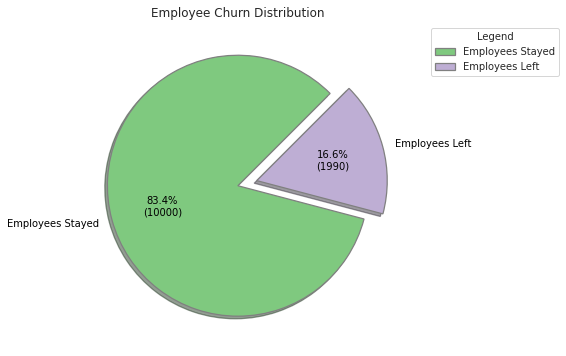

In [ ]:
labels = ['Employees Stayed', 'Employees Left']
explode = (0.0, 0.15)
palette_color = sns.color_palette('Accent')

# Wedge properties
wp = {'linewidth': 1.25, 'edgecolor': "gray"}


# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)


# Creating plot
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(df['left'].value_counts(),
                                  autopct=lambda pct: func(pct, df['left'].value_counts()),
                                  explode=explode,
                                  labels=labels,
                                  shadow=True,
                                  colors=palette_color,
                                  startangle=45,
                                  wedgeprops=wp,
                                  textprops=dict(color="black"))

ax.legend(wedges,
          labels,
          title="Legend",
          loc=0,
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10
         #, weight="bold"
         )
ax.set_title("Employee Churn Distribution")

plt.show()

## Number of Projects

In [ ]:
nop=df.number_project.value_counts()

In [ ]:
nop

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

In [ ]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


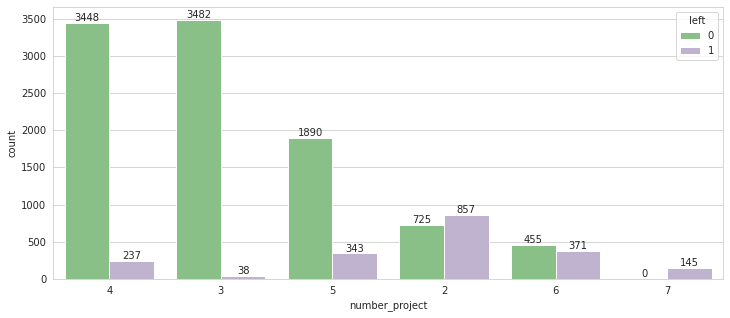

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'number_project',hue = df['left'], palette='Accent', order = df['number_project'].value_counts().index)
ax.bar_label(ax.containers[0]),
ax.bar_label(ax.containers[1])
plt.show()

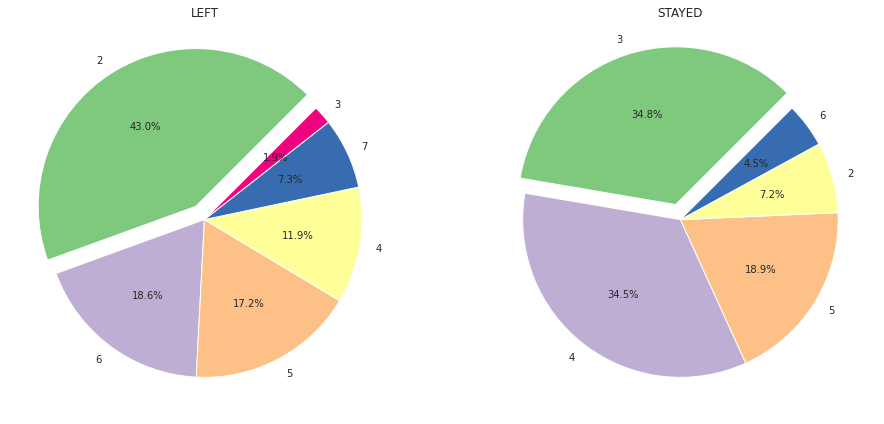

In [ ]:
# with seaborn
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
palette_color = sns.color_palette('Accent')
plt.subplot(1,3,2)
plt.pie(df[df.left == 1].number_project.value_counts(),colors=palette_color,labels = df[df.left == 1].number_project.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0,0])
plt.title('LEFT')
plt.subplot(1,3,3)
plt.pie(df[df.left == 0].number_project.value_counts(),colors=palette_color, labels = df[df.left == 0].number_project.value_counts().index, autopct = '%1.1f%%', startangle = 45, explode=[0.1,0,0,0,0])
plt.title('STAYED')
plt.tight_layout()
plt.show()

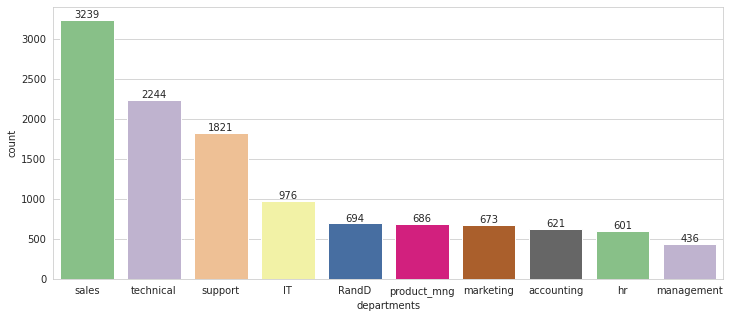

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = 'departments',palette='Accent', order = df['departments'].value_counts().index);
ax.bar_label(ax.containers[0])
plt.show()

## Time Spent in Company


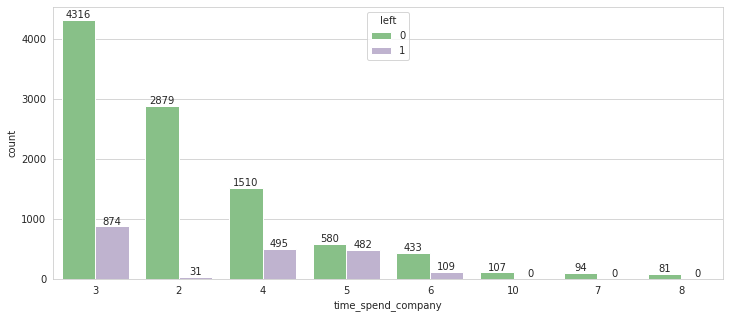

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data = df, x = "time_spend_company",hue=df["left"] ,palette='Accent' ,order = df["time_spend_company"].value_counts().index);
ax.bar_label(ax.containers[0]),
ax.bar_label(ax.containers[1])
plt.show()

## Subplots of Features

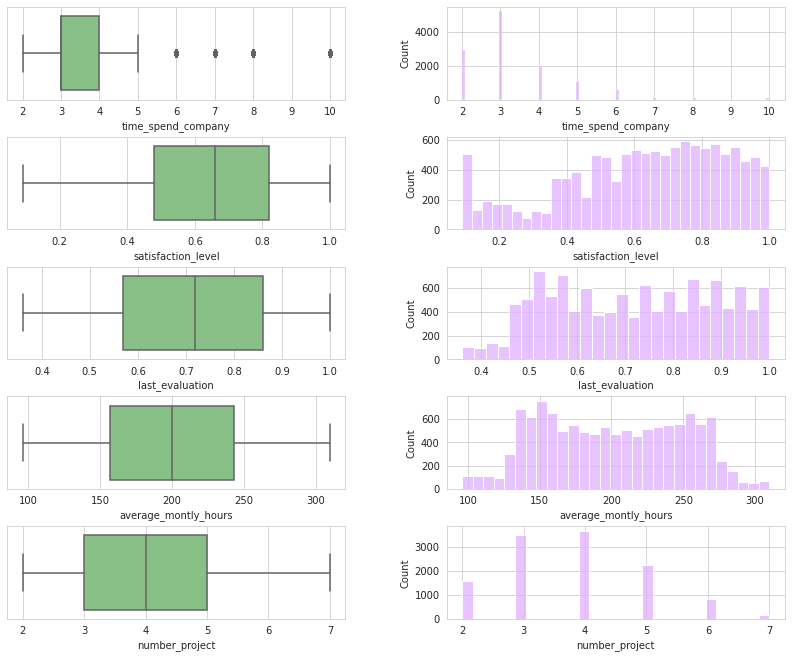

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(12, 10))

sns.boxplot(x=df["time_spend_company"],hue = df['left'],palette='Accent' , ax=ax[0, 0])
sns.histplot(df["time_spend_company"],color="#E0b0FF", ax=ax[0, 1])
sns.boxplot(x=df['satisfaction_level'],palette='Accent', ax=ax[1, 0])
sns.histplot(df["satisfaction_level"],color="#E0b0FF", ax=ax[1, 1])
sns.boxplot(x=df['last_evaluation'],palette='Accent', ax=ax[2, 0])
sns.histplot(df["last_evaluation"],color="#E0b0FF", ax=ax[2, 1])
sns.boxplot(x=df['average_montly_hours'],palette='Accent', ax=ax[3, 0])
sns.histplot(df["average_montly_hours"],color="#E0b0FF", ax=ax[3, 1])
sns.boxplot(x=df['number_project'],palette='Accent', ax=ax[4, 0])
sns.histplot(df["number_project"],color="#E0b0FF", ax=ax[4, 1])


fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.4, wspace=0.3)

plt.show()
  


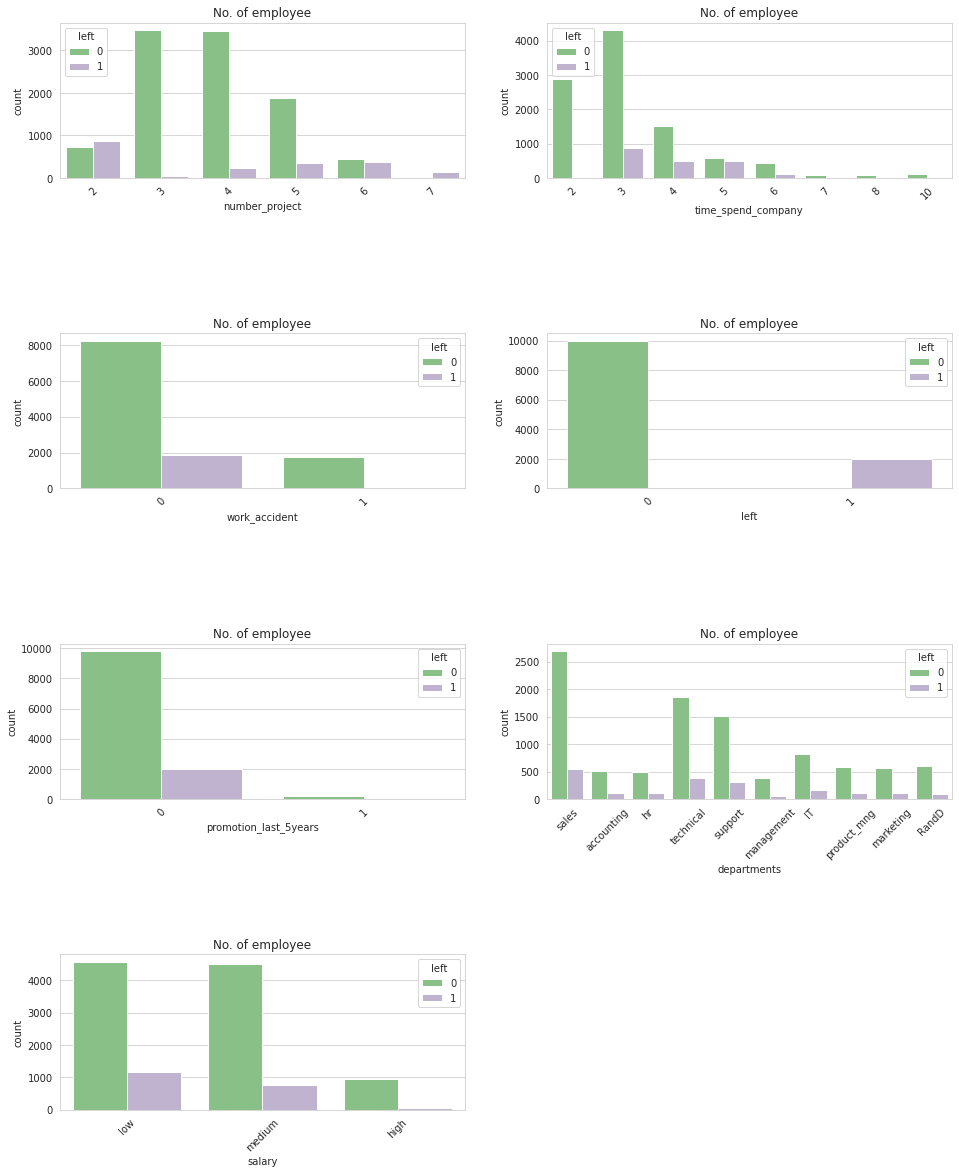

In [ ]:
features=['number_project','time_spend_company','work_accident','left', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(16,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df,hue='left',palette = 'Accent')
    plt.xticks(rotation=45)
    plt.title("No. of employee")

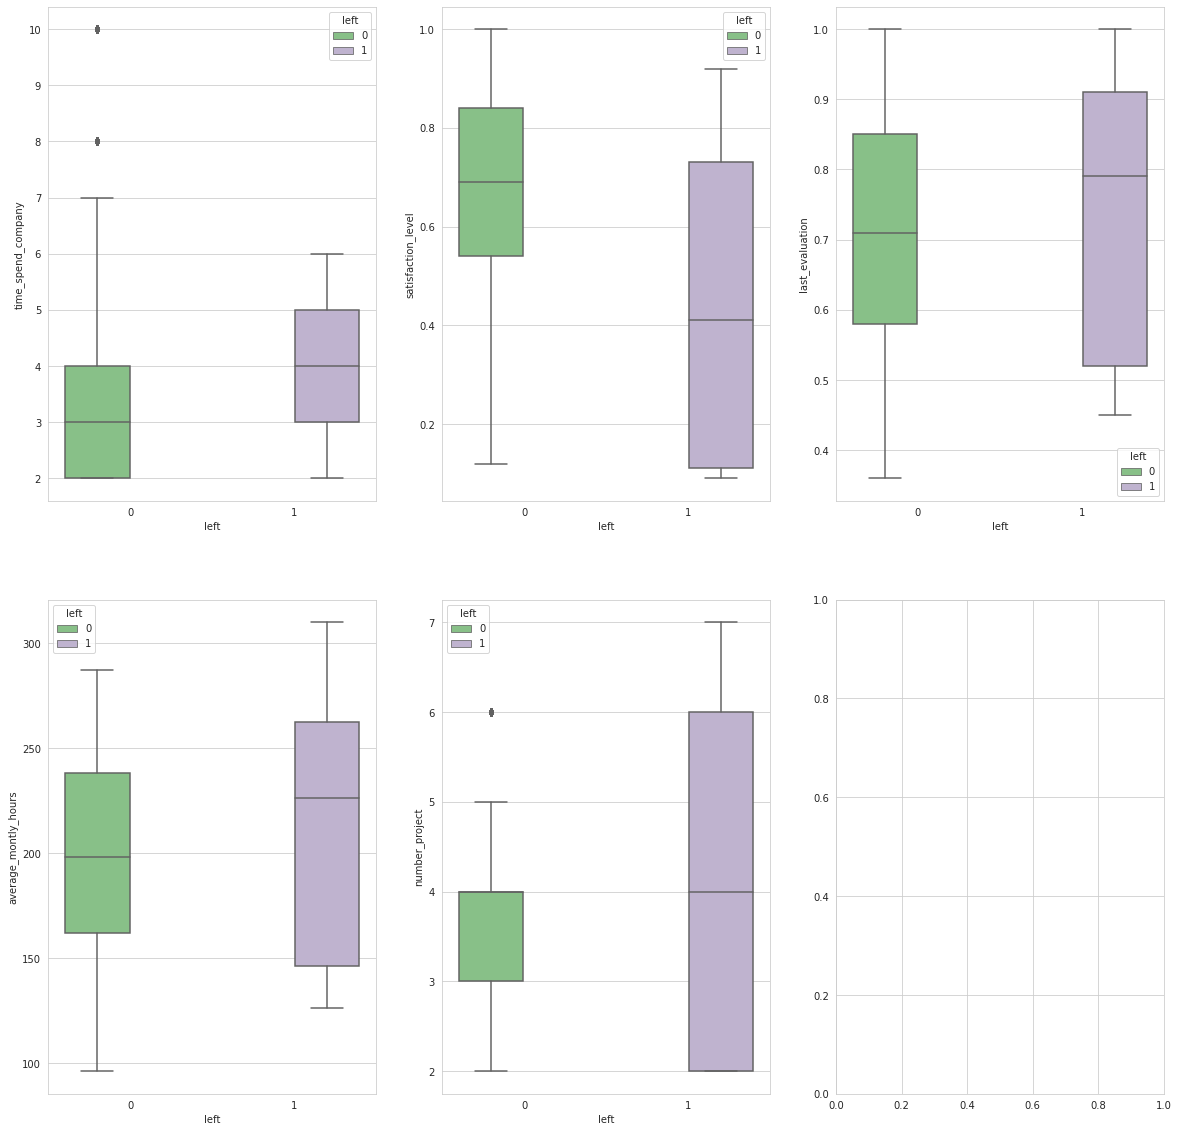

In [ ]:
features=['number_project','time_spend_company','work_accident','left', 'promotion_last_5years','departments','salary']
fig, axarr = plt.subplots(2,3 , figsize=(20, 20))
ax= sns.boxplot(y='time_spend_company',x = 'left', hue = 'left',data = df, ax=axarr[0][0],palette = 'Accent')
sns.boxplot(y='satisfaction_level',x = 'left', hue = 'left',data = df , ax=axarr[0][1],palette = 'Accent')
sns.boxplot(y='last_evaluation',x = 'left', hue = 'left',data = df, ax=axarr[0][2],palette = 'Accent')
sns.boxplot(y='average_montly_hours',x = 'left', hue = 'left',data = df, ax=axarr[1][0],palette = 'Accent')
sns.boxplot(y='number_project',x = 'left', hue = 'left',data = df, ax=axarr[1][1],palette = 'Accent')

plt.show()

<AxesSubplot:>

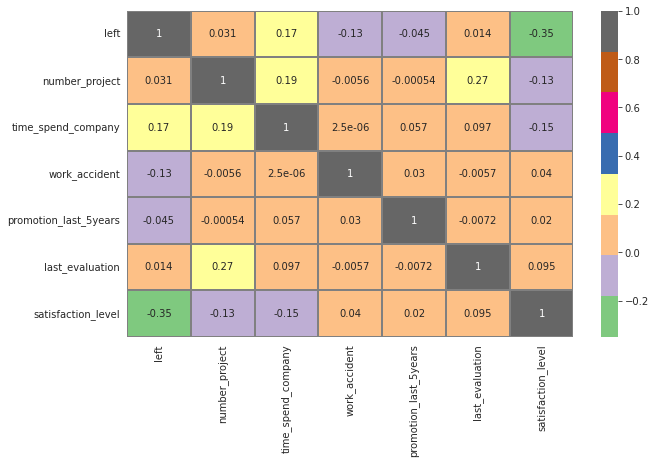

In [ ]:
features=['left','number_project','time_spend_company','work_accident', 'promotion_last_5years','last_evaluation','satisfaction_level']
sns.heatmap(df[features].corr(), annot=True, cmap = 'Accent' ,linewidths=1.5,
    linecolor='gray')

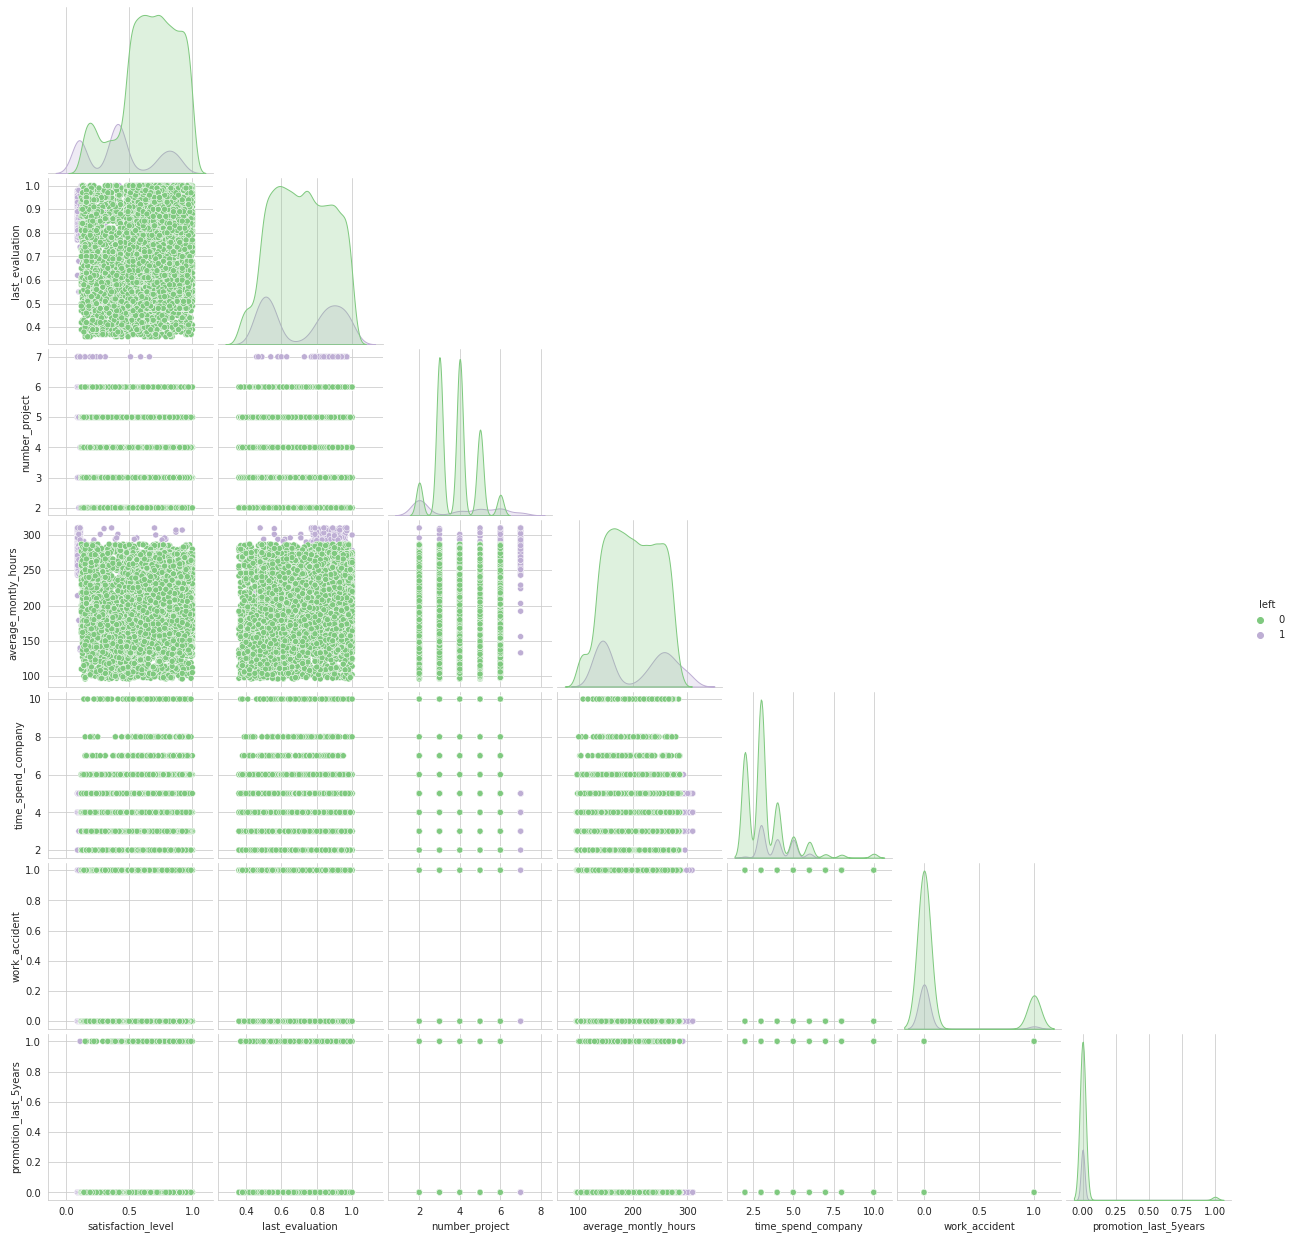

In [ ]:
sns.pairplot(data=df,hue="left",corner=True,palette='Accent');

# 3. Data Pre-Processing

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer

## Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

## Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.



In [ ]:
df.select_dtypes("object").columns


Index(['departments', 'salary'], dtype='object')

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df['salary']=label_encoder.fit_transform(df['salary'])
df['departments']=label_encoder.fit_transform(df['departments'])

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
X=df.drop(['salary'], axis=1)

In [ ]:
standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(X)


In [ ]:
df_standard


array([[-1.03566801, -1.10899046, -1.54992118, ...,  2.24111617,
        -0.13122844,  0.38940495],
       [ 0.70663718,  0.85137984,  1.02919412, ...,  2.24111617,
        -0.13122844,  0.38940495],
       [-2.15572134,  0.97019016,  2.74860432, ...,  2.24111617,
        -0.13122844,  0.38940495],
       ...,
       [ 0.91405447, -1.0495853 , -0.69021608, ..., -0.44620623,
         7.62029957, -0.64546978],
       [-1.24308529, -0.39612853, -0.69021608, ..., -0.44620623,
         7.62029957, -0.30051154],
       [-0.53786652,  0.07911275,  0.16948902, ..., -0.44620623,
        -0.13122844, -2.02530276]])

In [ ]:
min_max_scaler = MinMaxScaler()
df_min_max = min_max_scaler.fit_transform(X)

In [ ]:
df_min_max

array([[0.31868132, 0.265625  , 0.        , ..., 1.        , 0.        ,
        0.77777778],
       [0.78021978, 0.78125   , 0.6       , ..., 1.        , 0.        ,
        0.77777778],
       [0.02197802, 0.8125    , 1.        , ..., 1.        , 0.        ,
        0.77777778],
       ...,
       [0.83516484, 0.28125   , 0.2       , ..., 0.        , 1.        ,
        0.44444444],
       [0.26373626, 0.453125  , 0.2       , ..., 0.        , 1.        ,
        0.55555556],
       [0.45054945, 0.578125  , 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#X2 = df2.drop("left",axis=1)
#y2 = df2.left

In [ ]:
#X2.select_dtypes("object").columns 

In [ ]:
#X2['salary'].value_counts()

In [ ]:
#label_encoder = preprocessing.LabelEncoder()
#X2['salary']= label_encoder.fit_transform(df['salary'])

In [ ]:
#cat = X2.select_dtypes("object").columns 
#cat

In [ ]:
#column_trans_minmax = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
#                                       remainder=MinMaxScaler())
#column_trans_minmax

In [ ]:
#column_trans_standart = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
#                                       remainder=StandardScaler())

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=101, stratify = y2)

## Pipe Example for KNN

In [ ]:
#operations_knn = [("MinMaxScaler", column_trans_minmax ), ("knn", KNeighborsClassifier()),  ]
#knn_pipe_model = Pipeline(steps=operations_knn)

In [ ]:
#knn_pipe_model.fit(X_train, y_train)

# 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.53.0-cp38-cp38-manylinux2014_x86_64.whl (3.4 MB)
  Using cached llvmlite-0.36.0-cp38-cp38-manylinux2010_x86_64.whl (25.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyclustertend 1.8.2 requires numba<0.55.0,>=0.54.1, but you have numba 0.53.0 which is incompatible.


In [ ]:
!pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached llvmlite-0.37.0-cp38-cp38-manylinux2014_x86_64.whl (26.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
    Uninstalling llvmlite-0.36.0:
      Successfully uninstalled llvmlite-0.36.0
  Attempting uninstall: numba
    Found existing installation: numba 0.53.0
    Uninstalling numba-0.53.0:
      Successfully uninstalled numba-0.53.0


In [ ]:
from pyclustertend import hopkins

In [ ]:
hopkins(df_standard,df_standard.shape[0])

0.1289999985679641

In [ ]:
hopkins(df_min_max,df_min_max.shape[0])

0.14224728753945193

This dataset's hopkins result is under 0.5 and it seems that this data ise suitable for clustering

## The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

In [ ]:
#For Min_Max scaled data

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
ssd_min_max = [] # sum of squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_min_max)
    ssd_min_max.append(model.inertia_)

In [ ]:
ssd_min_max

[6138.6592640236,
 4696.756480465565,
 3988.6956096152553,
 3466.9096357799717,
 3175.139308533933,
 2980.8333170199694,
 2801.1735385194997,
 2655.6629919072875]

Text(0.5, 1.0, 'elbow method')

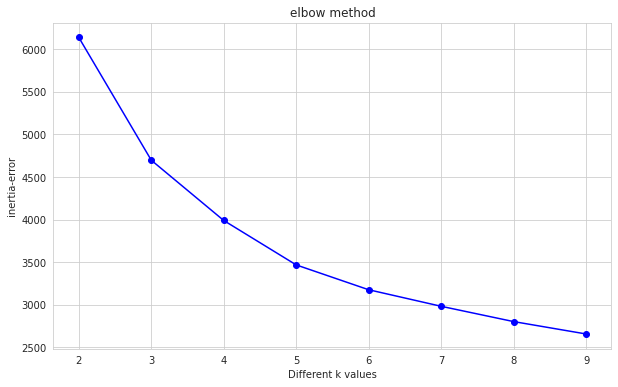

In [ ]:
plt.plot(K, ssd_min_max, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [ ]:
pd.Series(ssd_min_max).diff()

0        NaN
1   -1441.90
2    -708.06
3    -521.79
4    -291.77
5    -194.31
6    -179.66
7    -145.51
dtype: float64

In [ ]:
df1_diff =pd.DataFrame(-pd.Series(ssd_min_max).diff()).rename(index = lambda x : x+1)
df1_diff

,0
1,NaN
2,1441.90
3,708.06
4,521.79
5,291.77
6,194.31
7,179.66
8,145.51


<AxesSubplot:>

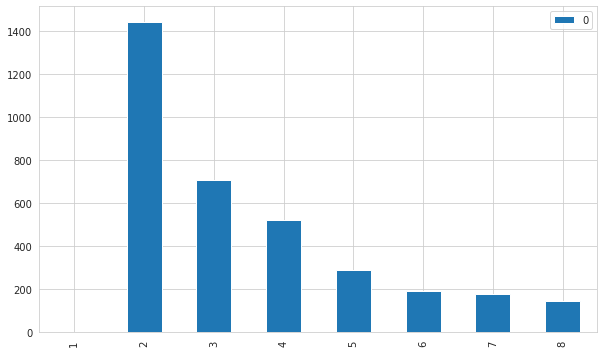

In [ ]:
df1_diff.plot(kind='bar')

In [ ]:
#For Standard scaled data

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
ssd_standard = [] # sum of squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_standard)
    ssd_standard.append(model.inertia_)

In [ ]:
ssd_standard

[93674.2564433486,
 81769.47503274326,
 72711.31884154963,
 61022.44935461758,
 54552.42939180053,
 49471.89820143111,
 45842.69750284176,
 42852.14998987854]

Text(0.5, 1.0, 'elbow method')

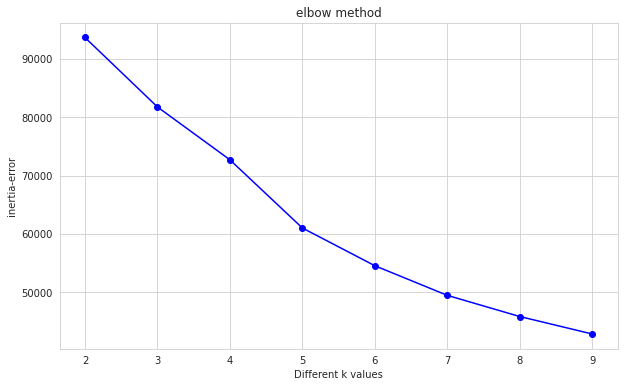

In [ ]:
plt.plot(K, ssd_standard, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [ ]:
pd.Series(ssd_standard).diff()

0         NaN
1   -11904.78
2    -9058.16
3   -11688.87
4    -6470.02
5    -5080.53
6    -3629.20
7    -2990.55
dtype: float64

In [ ]:
df2_diff =pd.DataFrame(-pd.Series(ssd_standard).diff()).rename(index = lambda x : x+1)
df2_diff

,0
1,NaN
2,11904.78
3,9058.16
4,11688.87
5,6470.02
6,5080.53
7,3629.20
8,2990.55


<AxesSubplot:>

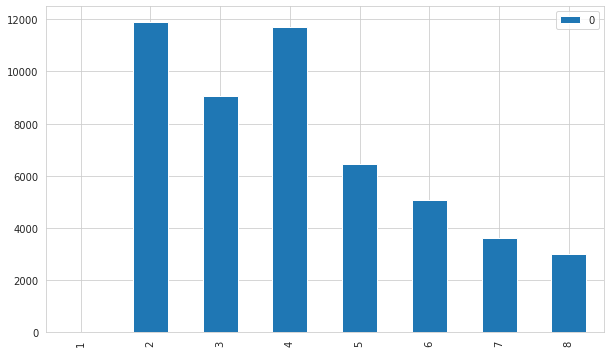

In [ ]:
df2_diff.plot(kind='bar')

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

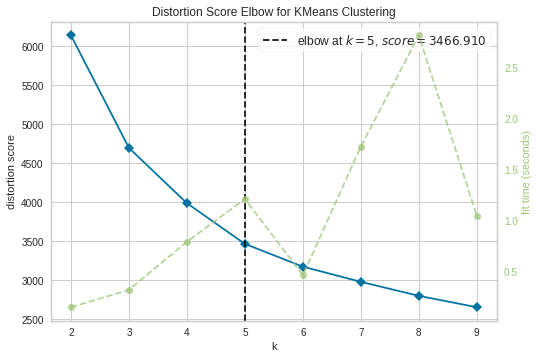

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_min_max)
visu.poof()

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_min_max)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_min_max, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3492602203696048
For n_clusters=3, the silhouette score is 0.3742585124081343
For n_clusters=4, the silhouette score is 0.28236182166279017
For n_clusters=5, the silhouette score is 0.3141622975502676
For n_clusters=6, the silhouette score is 0.2560938707843012
For n_clusters=7, the silhouette score is 0.26481367820747453
For n_clusters=8, the silhouette score is 0.2655273786637806
For n_clusters=9, the silhouette score is 0.2531989351390205
For n_clusters=10, the silhouette score is 0.2464653090985068


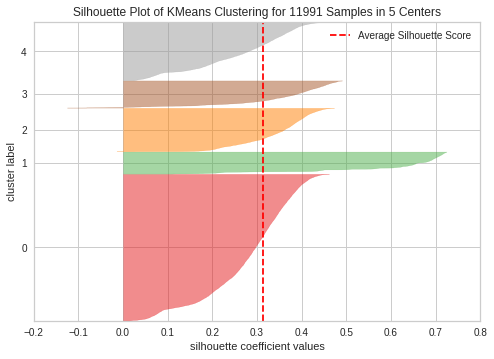

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df_min_max)    # Fit the data to the visualizer
visualizer.poof();


In [ ]:
kmeans = KMeans(n_clusters = 5, random_state=42)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

When we checked the columns except 'satisfaction_level' and 'last_evaluation' has limited values. Because of that reason clustering over 'satisfaction_level' and 'last_evaluation' can be more better

In [ ]:
df_3=df[['last_evaluation','satisfaction_level']]

In [ ]:
kmeans.fit_predict(df_3)

array([4, 2, 3, ..., 1, 4, 0], dtype=int32)

In [ ]:
df_3["cluster_Kmeans"] = kmeans.fit_predict(df_3) #kmeans.labels_

In [ ]:
df_3

,last_evaluation,satisfaction_level,cluster_Kmeans
0,0.53,0.38,4
1,0.86,0.80,2
2,0.88,0.11,3
3,0.87,0.72,2
4,0.52,0.37,4
...,...,...,...
11986,0.55,0.90,1
11987,0.95,0.74,2
11988,0.54,0.85,1
11989,0.65,0.33,4


In [ ]:
#df_clustered = df2.copy()
#df_clustered["Predicted_Clusters"] = kmeans.fit_predict(df_3)

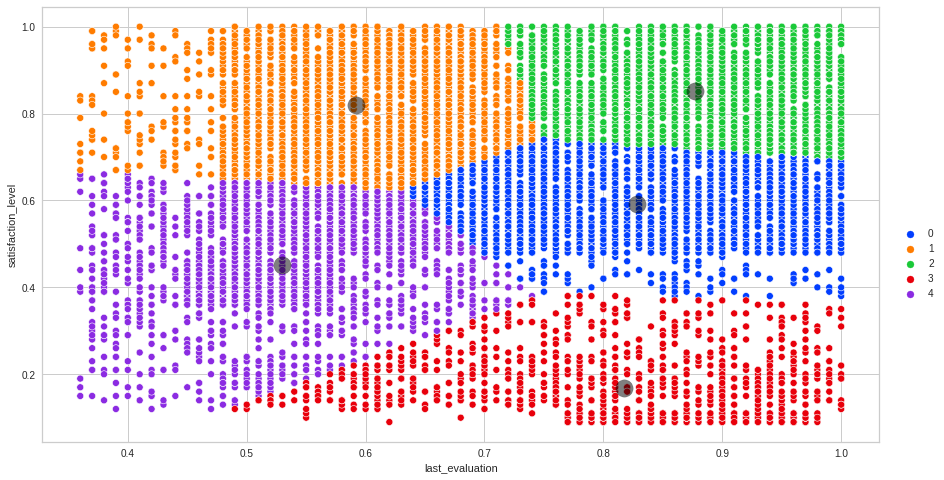

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='last_evaluation', y='satisfaction_level', hue="cluster_Kmeans", data=df_3, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='upper left', borderaxespad=0)

# 5. Model Building

In [ ]:
df4 = df2.copy()
df4["salary"] = df4["salary"].map({"low":0, "medium":1, "high":2})
df4.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


There is ordinality in salary. Not for losing that ordinality with map function i assigned the values

In [ ]:
# Alternative
#df.salary=df.salary.astype('category')
#df.salary=df.salary.cat.reorder_categories(['low', 'medium', 'high'])
#df.salary = df.salary.cat.codes

In [ ]:
X = df4.drop("left", axis=1)
y = df4["left"]

In [ ]:
X.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,sales,0
1,0.80,0.86,5,262,6,0,0,sales,1
2,0.11,0.88,7,272,4,0,0,sales,1


In [ ]:
y.head(3)

0    1
1    1
2    1
Name: left, dtype: int64

## Split Data as Train and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=101)

In [ ]:
cat = X.select_dtypes("object").columns
cat

Index(['departments'], dtype='object')

In [ ]:
column_trans_ohe = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

Departments has nominal values. So that for not having biased values we use one hot encoder

## Distance Based Algorithm - LogisticRegression

### Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [ ]:
operations_log_reg = [("MinMaxScaler", column_trans_ohe ), 
                        ("log_model", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101))]
                        
log_reg_pipe_model = Pipeline(steps=operations_log_reg)

In [ ]:
log_reg_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('MinMaxScaler',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['departments'], dtype='object'))])),
                ('log_model',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

### Evaluating Model Performance and Tuning

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")
    plt.title('Test Set - Confusion Matrix', y=1.1);

    print("- -- -" * 9)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train, cmap="plasma")
    plt.title('Train Set - Confusion Matrix', y=1.1)
    plt.show()

In [ ]:
#def train_val(y_train, y_train_pred, y_test, y_pred):
#    y_train_pred = model.predict(X_train)
#    y_pred_test = model.predict(X_test)
    
#    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
#                            "Precision" : precision_score(y_train, y_train_pred),
#                            "Recall" : recall_score(y_train, y_train_pred),                          
#                            "f1" : f1_score(y_train, y_train_pred)},
    
#              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
#                           "Precision" : precision_score(y_test, y_pred),
#                           "Recall" : recall_score(y_test, y_pred),                          
#                           "f1" : f1_score(y_test, y_pred)}}
    
#    return pd.DataFrame(scores)

LOGISTIC REGRESSION MODEL
* ** ** ** ** ** ** *
TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2001
           1       0.42      0.81      0.55       398

    accuracy                           0.78      2399
   macro avg       0.69      0.80      0.70      2399
weighted avg       0.87      0.78      0.81      2399

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.40      0.83      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.69      9592
weighted avg       0.86      0.77      0.80      9592



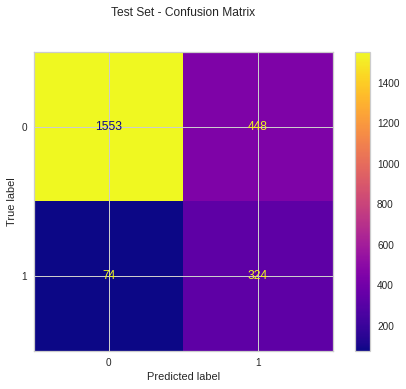

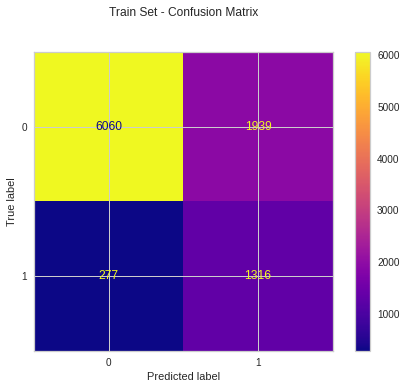

In [ ]:
print("LOGISTIC REGRESSION MODEL")
print("* *" * 7)
eval_metric(log_reg_pipe_model, X_train, y_train, X_test, y_test)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
# Cross Validation for Left Employee

from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

scoring = {"f1_Left" : make_scorer(f1_score, average = None, labels =[1]),
           "precision_Left" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Left" : make_scorer(recall_score, average = None, labels =[1])}

In [ ]:
operations_log_reg = [("MinMaxScaler", column_trans_ohe ), 
                        ("log_model", LogisticRegression(class_weight="balanced", max_iter=10000, random_state=101))]
model_lr_cv = Pipeline(operations_log_reg)

scores_lr_cv = cross_validate(model_lr_cv, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)

df_scores_lr_cv = pd.DataFrame(scores_lr_cv, index = range(1, 11))
df_scores_lr_cv.mean()[2:]

test_f1_Left           0.54
train_f1_Left          0.54
test_precision_Left    0.40
train_precision_Left   0.40
test_recall_Left       0.82
train_recall_Left      0.82
dtype: float64

### Gridsearch

In [ ]:
recall_Left = make_scorer(recall_score, average = None, labels =[1])

In [ ]:
model_lr_gs = Pipeline(operations_log_reg)

#defined parameters for param_grid
penalty = ["l1", "l2"]
C = np.linspace(0.5, 3.5, 16)  # np.arange(0.5, 3.5, 0.15)
solver = ['liblinear', 'lbfgs']

param_grid = {"log_model__penalty" : penalty,
             "log_model__C" : C,
             "log_model__solver" : solver}

log_grid_model = GridSearchCV(model_lr_gs, param_grid = param_grid, scoring=recall_Left, cv=5, n_jobs=-1, return_train_score=True)

In [ ]:
log_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MinMaxScaler',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['departments'], dtype='object'))])),
                                       ('log_model',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log_model__C': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 

In [ ]:
log_grid_model.best_estimator_

Pipeline(steps=[('MinMaxScaler',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['departments'], dtype='object'))])),
                ('log_model',
                 LogisticRegression(C=1.1, class_weight='balanced',
                                    max_iter=10000, penalty='l1',
                                    random_state=101, solver='liblinear'))])

In [ ]:
log_grid_model.best_params_

{'log_model__C': 1.1,
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [ ]:
log_grid_model.best_score_

0.8248634687801897

### Prediction

LOGISTIC REGRESSION GRID MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2001
           1       0.42      0.82      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.80      0.71      2399
weighted avg       0.87      0.78      0.81      2399

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.83      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.69      9592
weighted avg       0.87      0.77      0.80      9592



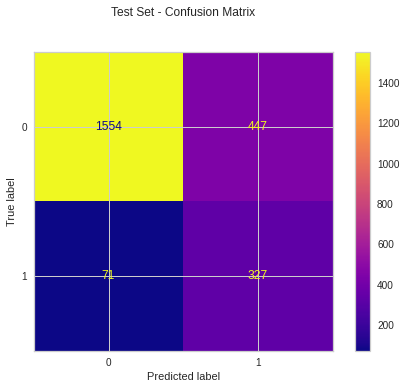

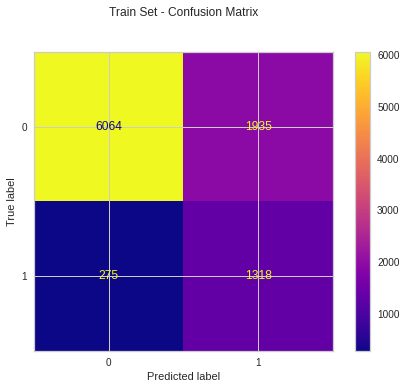

In [ ]:
print("LOGISTIC REGRESSION GRID MODEL")
print("***" * 7)
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)
# Scores are almost still same with vanilla model

### ROC and Precision-Recall Curves

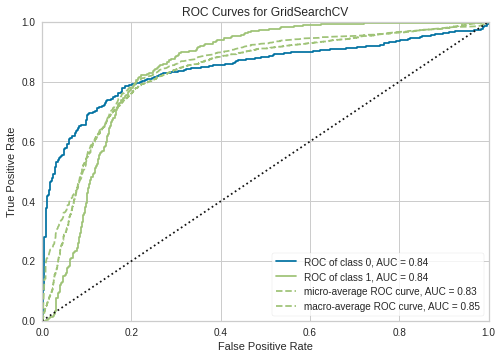

In [ ]:
from yellowbrick.classifier import ROCAUC  # For Balanced Data / For Binary Data

model = log_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

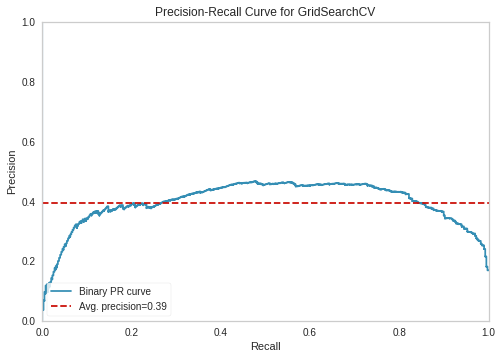

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve  # For Un-Balanced Data

model = log_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = log_grid_model.predict(X_test)

log_grid_rec = recall_score(y_test, y_pred, average = None)
log_grid_f1 = f1_score(y_test, y_pred, average = None)
log_grid_AP = viz.score(X_test, y_test)

## Random Forest Classifier

#### Model Building

In [ ]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder=MinMaxScaler())

In [ ]:
RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 101)

operations_rf = [("MinMaxScaler", column_trans), 
                        ("rf_model", RF_model)]
rf_pipe_model = Pipeline(steps=operations_rf)

In [ ]:
rf_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('MinMaxScaler',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments'], dtype='object'))])),
                ('rf_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

RANDOM FOREST MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.97      0.98      2399
weighted avg       0.99      0.99      0.99      2399

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



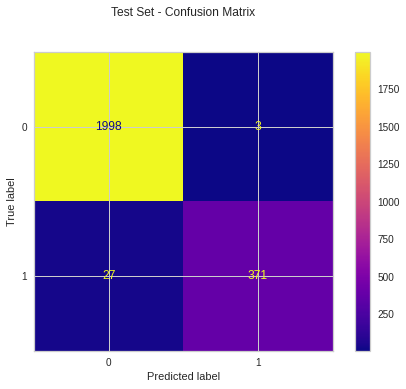

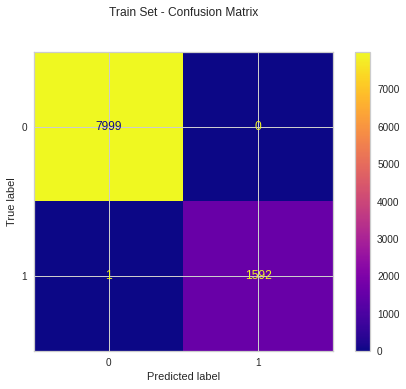

In [ ]:
print("RANDOM FOREST MODEL")
print("***" * 7)
eval_metric(rf_pipe_model, X_train, y_train, X_test, y_test)

#### Cross Validation

In [ ]:
scoring = {"f1_Left" : make_scorer(f1_score, average = None, labels =[1]),
           "precision_Left" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Left" : make_scorer(recall_score, average = None, labels =[1])}

In [ ]:
operations_rf_cv = [("MinMaxScaler", column_trans), 
                 ("rf_model", RandomForestClassifier(class_weight = "balanced", random_state = 101))]
model_rf_cv = Pipeline(operations_rf_cv)

scores = cross_validate(model_rf_cv, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)

df_scores_rf_cv = pd.DataFrame(scores, index = range(1, 11))
df_scores_rf_cv.mean()[2:]

test_f1_Left           0.94
train_f1_Left          1.00
test_precision_Left    0.99
train_precision_Left   1.00
test_recall_Left       0.90
train_recall_Left      1.00
dtype: float64

#### Grid Search

In [ ]:
recall_Left = make_scorer(recall_score, average = None, labels =[1])

In [ ]:
model_rf_gs = Pipeline(operations_rf_cv)

param_grid = {'rf_model__max_depth' : [3, 4],
              'rf_model__max_features' : [4, 5, 6],              
              'rf_model__min_samples_split' : [8, 10, 12],
              'rf_model__n_estimators' : [100, 150, 200]}

rf_grid_model = GridSearchCV(model_rf_gs, param_grid = param_grid, scoring=recall_Left, cv=5, n_jobs=-1, return_train_score=True)

In [ ]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MinMaxScaler',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments'], dtype='object'))])),
                                       ('rf_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'rf_model__max_depth': [3, 4],
                         'rf_model__max_features': [4, 5, 6],
                         'rf_model_

In [ ]:
rf_grid_model.best_estimator_

Pipeline(steps=[('MinMaxScaler',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments'], dtype='object'))])),
                ('rf_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features=6, min_samples_split=8,
                                        random_state=101))])

In [ ]:
rf_grid_model.best_params_

{'rf_model__max_depth': 3,
 'rf_model__max_features': 6,
 'rf_model__min_samples_split': 8,
 'rf_model__n_estimators': 100}

In [ ]:
rf_grid_model.best_score_

0.9359653792314819

#### Evaluating Model Performance and Tuning

RANDOM FOREST GRID MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2001
           1       0.68      0.95      0.80       398

    accuracy                           0.92      2399
   macro avg       0.84      0.93      0.87      2399
weighted avg       0.94      0.92      0.92      2399

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      7999
           1       0.68      0.94      0.79      1593

    accuracy                           0.92      9592
   macro avg       0.83      0.92      0.87      9592
weighted avg       0.93      0.92      0.92      9592



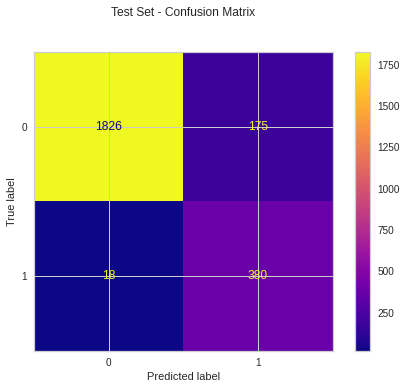

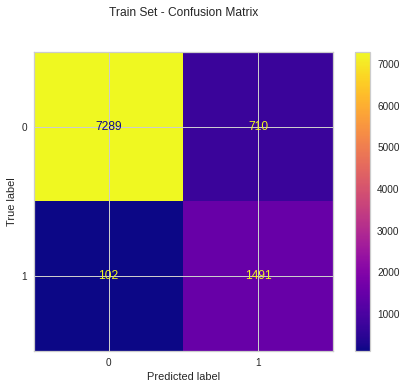

In [ ]:
print("RANDOM FOREST GRID MODEL")
print("***" * 7)
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
operations_rf_tuned = [("MinMaxScaler", column_trans), 
                       ("rf_tuned_model", RandomForestClassifier(class_weight = "balanced", max_depth=3, max_features=5, min_samples_split=10, n_estimators=150, random_state = 101))]
                         
model_rf_tuned = Pipeline(operations_rf_tuned)

In [ ]:
model_rf_tuned.fit(X_train, y_train)

Pipeline(steps=[('MinMaxScaler',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments'], dtype='object'))])),
                ('rf_tuned_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features=5, min_samples_split=10,
                                        n_estimators=150, random_state=101))])

#### Prediction

RANDOM FOREST TUNED MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2001
           1       0.73      0.95      0.82       398

    accuracy                           0.93      2399
   macro avg       0.86      0.94      0.89      2399
weighted avg       0.95      0.93      0.94      2399

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      7999
           1       0.71      0.94      0.81      1593

    accuracy                           0.93      9592
   macro avg       0.85      0.93      0.88      9592
weighted avg       0.94      0.93      0.93      9592



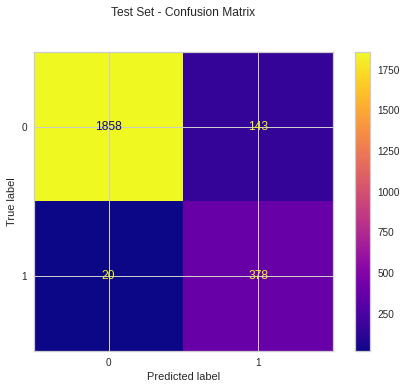

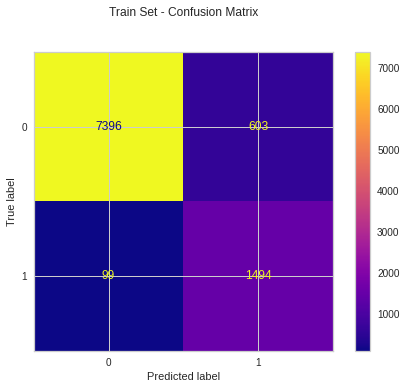

In [ ]:
print("RANDOM FOREST TUNED MODEL")
print("***" * 7)
eval_metric(model_rf_tuned, X_train, y_train, X_test, y_test)

#### ROC and Precision-Recall Curves

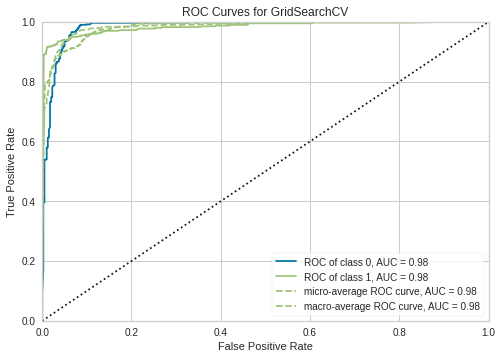

In [ ]:
from yellowbrick.classifier import ROCAUC  # For Balanced Data / For Binary Data

model = rf_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

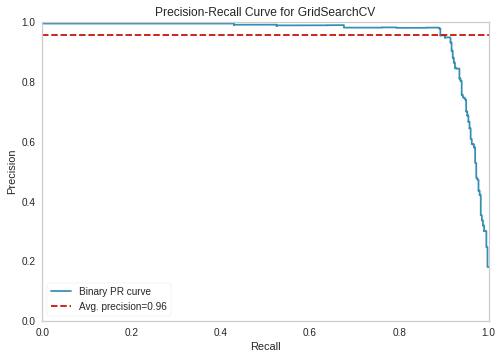

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve  # For Un-Balanced Data

model = rf_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

#### Feature Importance

In [ ]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['departments',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years',
 'salary']

In [ ]:
RF_fea_imp = pd.DataFrame(data=model_rf_tuned["rf_tuned_model"].feature_importances_, 
                          index=features, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
RF_fea_imp

,Feature Importance
satisfaction_level,0.39
time_spend_company,0.34
number_project,0.11
average_montly_hours,0.09
last_evaluation,0.08
work_accident,0.00
departments,0.00
salary,0.00
promotion_last_5years,0.00


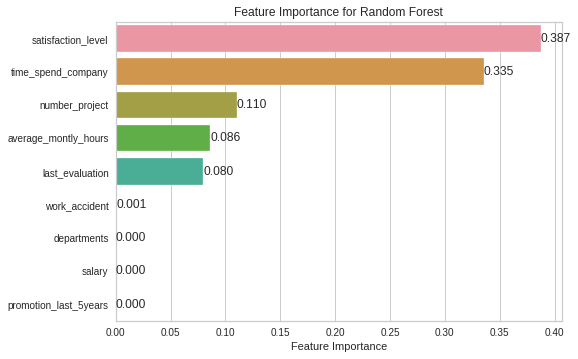

In [ ]:
ax = sns.barplot(x=RF_fea_imp["Feature Importance"], y=RF_fea_imp.index)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

In [ ]:
y_pred = model_rf_tuned.predict(X_test)

model_rf_tuned_rec = recall_score(y_test, y_pred, average = None)
model_rf_tuned_f1 = f1_score(y_test, y_pred, average = None)
model_rf_tuned_AP = viz.score(X_test, y_test)

## XGBoost Classifier

### Model Building

In [ ]:
from xgboost import XGBClassifier

In [ ]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder=MinMaxScaler())

In [ ]:
xgb_model = XGBClassifier(random_state=101)

operations_xgb = [("MinMaxScaler", column_trans), 
                        ("xgb_model", xgb_model)]
xgb_pipe_model = Pipeline(steps=operations_xgb)

In [ ]:
xgb_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('MinMaxScaler',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments'], dtype='object'))])),
                ('xgb_model', XGBClassifier(random_state=101))])

XGBOOST MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.95      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7999
           1       0.97      0.92      0.94      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



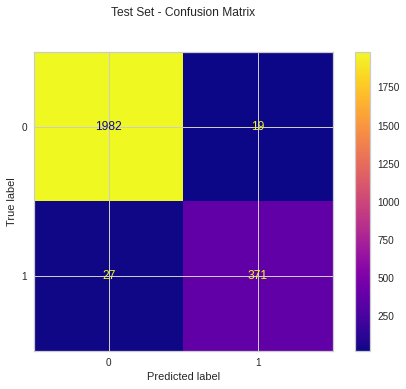

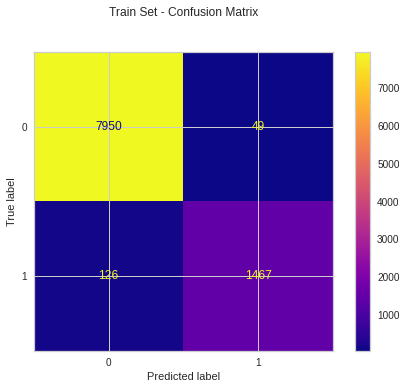

In [ ]:
print("XGBOOST MODEL")
print("***" * 7)
eval_metric(xgb_pipe_model, X_train, y_train, X_test, y_test)

### Cross Validation

In [ ]:
scoring = {"f1_Left" : make_scorer(f1_score, average = None, labels =[1]),
           "precision_Left" : make_scorer(precision_score, average = None, labels =[1]),
           "recall_Left" : make_scorer(recall_score, average = None, labels =[1])}

In [ ]:
operations_xgb_cv = [("MinMaxScaler", column_trans), 
                        ("xgb_model", xgb_model)]
model_xgb_cv = Pipeline(steps=operations_xgb_cv)

scores = cross_validate(model_xgb_cv, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)

df_scores_xgb_cv = pd.DataFrame(scores, index=range(1, 11))
df_scores_xgb_cv.mean()[2:]

test_f1_Left           0.94
train_f1_Left          0.94
test_precision_Left    0.97
train_precision_Left   0.97
test_recall_Left       0.91
train_recall_Left      0.92
dtype: float64

### Grid Search

In [ ]:
recall_Left = make_scorer(recall_score, average = None, labels =[1])

In [ ]:
model_xgb_gs = Pipeline(operations_xgb_cv)

param_grid = {'xgb_model__learning_rate': [0.1, 0.15, 0.20],
              'xgb_model__max_depth' : [4, 5, 6],
              'xgb_model__max_features' : [3, 4, 5],              
              'xgb_model__n_estimators' : [180, 200, 220],
              'xgb_model__subsample': [0.8, 1]
              }

xgb_grid_model = GridSearchCV(model_xgb_gs, param_grid = param_grid, scoring=recall_Left, cv=5, n_jobs=-1, return_train_score=True)

In [ ]:
xgb_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('MinMaxScaler',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['departments'], dtype='object'))])),
                                       ('xgb_model',
                                        XGBClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'xgb_model__learning_rate': [0.1, 0.15, 0.2],
                         'xgb_model__max_depth': [4, 5, 6],
                         'xgb_model__max_features': [3, 4, 5],
                         'xgb_model__n_estimators': [18

In [ ]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('MinMaxScaler',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments'], dtype='object'))])),
                ('xgb_model',
                 XGBClassifier(max_depth=4, max_features=3, n_estimators=180,
                               random_state=101))])

In [ ]:
xgb_grid_model.best_params_

{'xgb_model__learning_rate': 0.1,
 'xgb_model__max_depth': 4,
 'xgb_model__max_features': 3,
 'xgb_model__n_estimators': 180,
 'xgb_model__subsample': 1}

In [ ]:
xgb_grid_model.best_score_

0.9202835117604147

### Evaluating Model Performance and Tuning

XGBOOST GRID MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.94      0.96       398

    accuracy                           0.99      2399
   macro avg       0.98      0.97      0.97      2399
weighted avg       0.99      0.99      0.99      2399

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.98      0.93      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



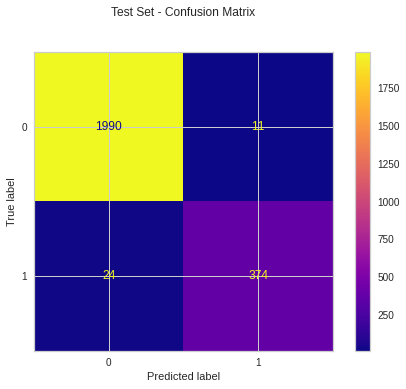

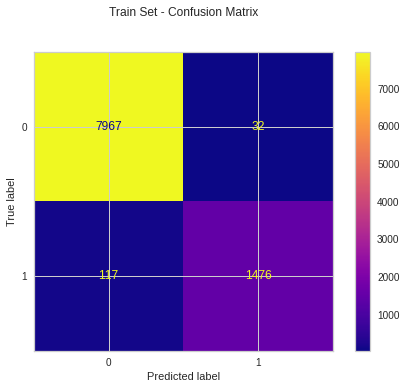

In [ ]:
print("XGBOOST GRID MODEL")
print("***" * 7)
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

In [ ]:
operations_xgb_tuned = [("MinMaxScaler", column_trans), 
                        ("xgb_tuned_model", XGBClassifier(learning_rate=0.1, max_depth=4, max_features=3, n_estimators=180, subsample=1, random_state=42))]
                         
model_xgb_tuned = Pipeline(operations_xgb_tuned)

In [ ]:
model_xgb_tuned.fit(X_train, y_train)

Pipeline(steps=[('MinMaxScaler',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['departments'], dtype='object'))])),
                ('xgb_tuned_model',
                 XGBClassifier(max_depth=4, max_features=3, n_estimators=180,
                               random_state=42))])

### Prediction

XGBOOST TUNED MODEL
*********************
TEST REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.94      0.96       398

    accuracy                           0.99      2399
   macro avg       0.98      0.97      0.97      2399
weighted avg       0.99      0.99      0.99      2399

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.98      0.93      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



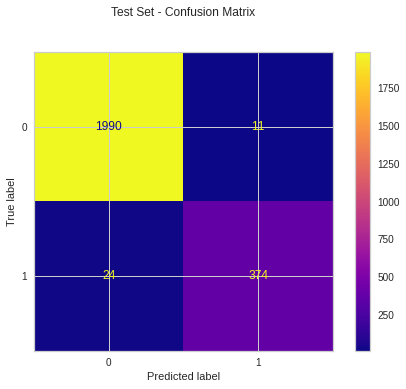

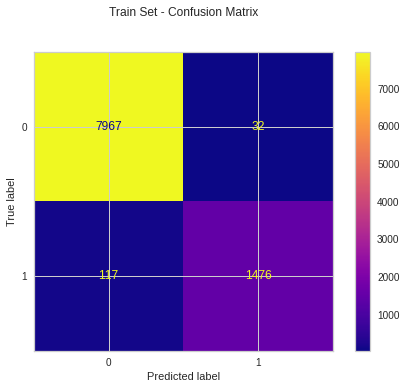

In [ ]:
print("XGBOOST TUNED MODEL")
print("***" * 7)
eval_metric(model_xgb_tuned, X_train, y_train, X_test, y_test)

### ROC and Precision-Recall Curves

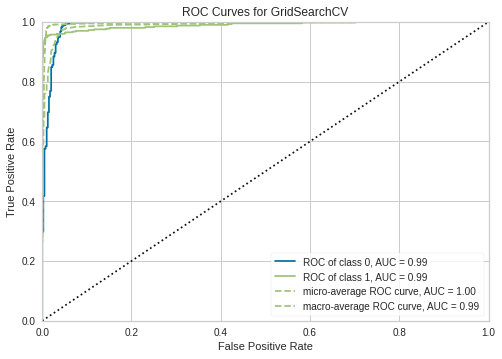

In [ ]:
model = xgb_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

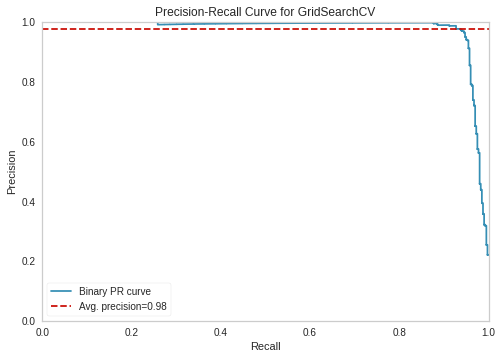

In [ ]:
model = xgb_grid_model

viz = PrecisionRecallCurve(model, per_class=True, cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
y_pred = model_xgb_tuned.predict(X_test)

xgb_tuned_recall = recall_score(y_test, y_pred)
xgb_tuned_f1 = f1_score(y_test, y_pred)
xgb_tuned_AP = viz.score(X_test, y_test)

### Feature Importance

In [ ]:
features = list(X_train.select_dtypes("object").columns) + list(X_train.select_dtypes("number").columns)
features

['departments',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years',
 'salary']

In [ ]:
XGB_fea_imp = pd.DataFrame(data=model_xgb_tuned["xgb_tuned_model"].feature_importances_, 
                           index=features, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
XGB_fea_imp

,Feature Importance
satisfaction_level,0.34
time_spend_company,0.21
number_project,0.20
last_evaluation,0.11
average_montly_hours,0.06
work_accident,0.04
salary,0.03
departments,0.01
promotion_last_5years,0.01


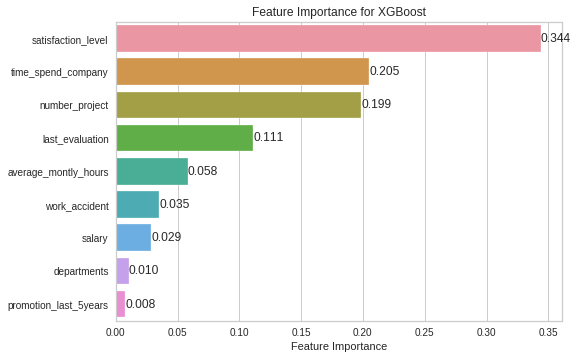

In [ ]:
ax = sns.barplot(x=XGB_fea_imp["Feature Importance"], y=XGB_fea_imp.index)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title("Feature Importance for XGBoost")
plt.show()

## ANN Classifier

### Layer Architecture Building and Compiling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
X_train.shape

(9592, 9)

In [ ]:
X_test.shape

(2399, 9)

In [ ]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)

In [ ]:
seed = 101

In [ ]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995749468683585, 1: 3.01067168863779}

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [ ]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=500, verbose=1, class_weight=class_weights, callbacks=[early_stop])

Epoch 1/500
270/270 [==============================] - 4s 5ms/step - loss: 0.7840 - recall: 0.4230 - val_loss: 0.6623 - val_recall: 0.0667
Epoch 2/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6981 - recall: 0.3263 - val_loss: 0.6553 - val_recall: 0.0000e+00
Epoch 3/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6894 - recall: 0.3263 - val_loss: 0.6580 - val_recall: 0.0424
Epoch 4/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6820 - recall: 0.3480 - val_loss: 0.6579 - val_recall: 0.3879
Epoch 5/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6672 - recall: 0.6464 - val_loss: 0.6154 - val_recall: 0.7818
Epoch 6/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6324 - recall: 0.7038 - val_loss: 0.5287 - val_recall: 0.6727
Epoch 7/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6147 - recall: 0.7661 - val_loss: 0.5269 - val_recall: 0.7939
Epoch 8/500
270/270 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                180       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                228       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 493
Trainable params: 493
Non-trainable pa

### Evaluating Model Performance and Tunning

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(20)

,loss,recall,val_loss,val_recall
65,0.30,0.92,0.19,0.93
66,0.29,0.92,0.19,0.94
67,0.29,0.92,0.19,0.92
68,0.30,0.92,0.18,0.92
69,0.30,0.92,0.17,0.90
70,0.30,0.92,0.18,0.93
71,0.29,0.92,0.19,0.94
72,0.30,0.92,0.21,0.95
73,0.30,0.93,0.20,0.93
74,0.30,0.92,0.19,0.94


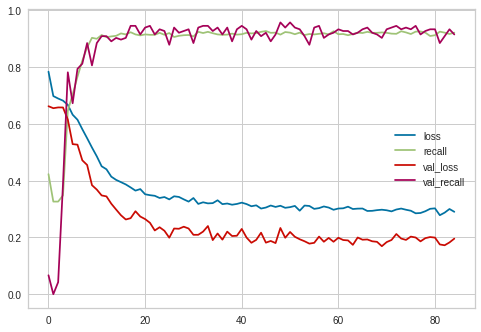

In [ ]:
loss_df.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print("loss : ", loss)
print("accuracy : ", accuracy)
# with BatchNormalization loss: 0.22, accuracy: 0.86

loss :  0.16627894341945648
accuracy :  0.8969849348068237


### Prediction

In [ ]:
y_pred = model.predict(X_test) > 0.5  
#y_pred = model.predict_classes(X_test) for tf 2.5.0

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 [==============================] - 0s 1ms/step
[[1939   62]
 [  41  357]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.85      0.90      0.87       398

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.92      2399
weighted avg       0.96      0.96      0.96      2399



### ROC and Precision-Recall Curves

### Precision-Recall Curve

75/75 [==============================] - 0s 1ms/step


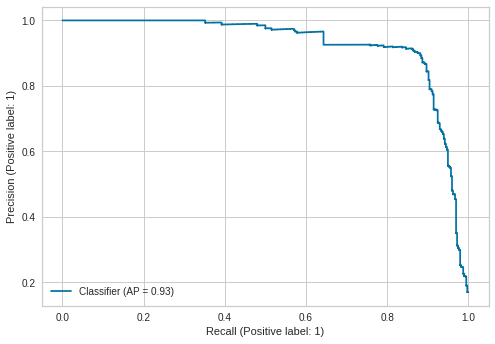

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show();

75/75 [==============================] - 0s 2ms/step


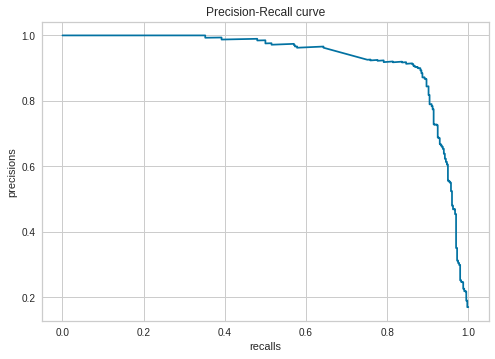

In [ ]:
y_pred = model.predict(X_test)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)  # un-balanced data

plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred)

0.9260289954716149

### Variance-based Feature Importance of Artificial Neural Networks

[GitHub Link - Rebelosa](https://github.com/rebelosa/feature-importance-neural-networks)

In [ ]:
class VarImpVIANN(keras.callbacks.Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        self.n = 0
        self.M2 = 0.0

    def on_train_begin(self, logs={}, verbose = 1):
        if self.verbose:
            print("VIANN version 1.0 (Wellford + Mean) update per epoch")
        self.diff = self.model.layers[0].get_weights()[0]
        
    def on_epoch_end(self, batch, logs={}):
        currentWeights = self.model.layers[0].get_weights()[0]
        
        self.n += 1
        delta = np.subtract(currentWeights, self.diff)
        self.diff += delta/self.n
        delta2 = np.subtract(currentWeights, self.diff)
        self.M2 += delta*delta2
            
        self.lastweights = self.model.layers[0].get_weights()[0]

    def on_train_end(self, batch, logs={}):
        if self.n < 2:
            self.s2 = float('nan')
        else:
            self.s2 = self.M2 / (self.n - 1)
        
        scores = np.sum(np.multiply(self.s2, np.abs(self.lastweights)), axis = 1)
        
        self.varScores = (scores - min(scores)) / (max(scores) - min(scores))
        if self.verbose:
            print("Most important variables: ",
                  np.array(self.varScores).argsort()[-10:][::-1])

In [ ]:
VIANN = VarImpVIANN(verbose=1)

model = Sequential()
model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [ ]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=500, verbose=1, class_weight=class_weights, shuffle=True, callbacks=[early_stop, VIANN])

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/500
270/270 [==============================] - 2s 5ms/step - loss: 0.7289 - recall: 0.5329 - val_loss: 0.6838 - val_recall: 0.3818
Epoch 2/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6946 - recall: 0.3487 - val_loss: 0.6703 - val_recall: 0.0000e+00
Epoch 3/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6924 - recall: 0.2857 - val_loss: 0.6720 - val_recall: 0.0242
Epoch 4/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6895 - recall: 0.3207 - val_loss: 0.6835 - val_recall: 0.4848
Epoch 5/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6833 - recall: 0.3824 - val_loss: 0.6691 - val_recall: 0.6000
Epoch 6/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6689 - recall: 0.3810 - val_loss: 0.6206 - val_recall: 0.6485
Epoch 7/500
270/270 [==============================] - 1s 4ms/step - loss: 0.6384 - recall: 0.5427 - val_loss

### Feature Importance

In [ ]:
print(VIANN.varScores)

[2.6608419e-03 1.0000000e+00 9.9227149e-03 4.7520950e-01 4.7368994e-03
 3.8462794e-01 8.0729520e-04 4.3501877e-03 0.0000000e+00]


In [ ]:
ANN_fea_imp = pd.DataFrame(data=VIANN.varScores/np.sum(VIANN.varScores), 
                           index=features, columns=["Feature Importance"]).sort_values("Feature Importance", ascending=False)
ANN_fea_imp

,Feature Importance
satisfaction_level,0.53
number_project,0.25
time_spend_company,0.20
last_evaluation,0.01
average_montly_hours,0.00
promotion_last_5years,0.00
departments,0.00
work_accident,0.00
salary,0.00


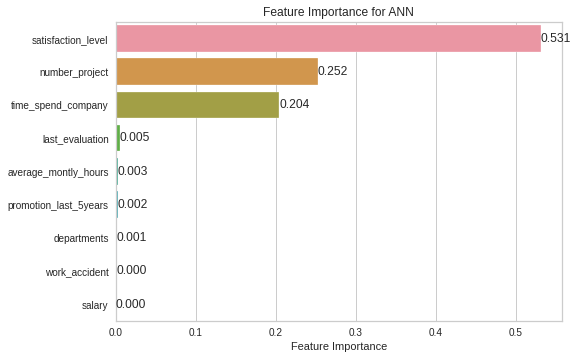

In [ ]:
ax = sns.barplot(x=ANN_fea_imp["Feature Importance"], y=ANN_fea_imp.index)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title("Feature Importance for ANN")
plt.show()

In [ ]:
#precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

ANN_rec = np.mean(recalls)
ANN_f1 = np.mean((2 * precisions * recalls)/(precisions + recalls))
ANN_AP = average_precision_score(y_test, y_pred)

# Compare Models

## Feature Importance Comparison

In [ ]:
df_feature_imp = RF_fea_imp.add_prefix("RF-").join(XGB_fea_imp.add_prefix("XGB-"))
df_feature_imp = df_feature_imp.join(ANN_fea_imp.add_prefix("ANN-"))
df_feature_imp

,RF-Feature Importance,XGB-Feature Importance,ANN-Feature Importance
satisfaction_level,0.39,0.34,0.53
time_spend_company,0.34,0.21,0.20
number_project,0.11,0.20,0.25
average_montly_hours,0.09,0.06,0.00
last_evaluation,0.08,0.11,0.01
work_accident,0.00,0.04,0.00
departments,0.00,0.01,0.00
salary,0.00,0.03,0.00
promotion_last_5years,0.00,0.01,0.00


## F1 Scores, Recall Scores and Average Precision Score Comparison

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Random Forest Classifier", "XGBoost Classifier", "ANN Classifier"],
                        "Recall_Score": [log_grid_rec[1], model_rf_tuned_rec[1],  xgb_tuned_recall, ANN_rec],
                        "F1_Score":     [log_grid_f1[1],  model_rf_tuned_f1[1],   xgb_tuned_f1,     ANN_f1],
                        "AP_Score":     [log_grid_AP,     model_rf_tuned_AP,      xgb_tuned_AP,     ANN_AP]})

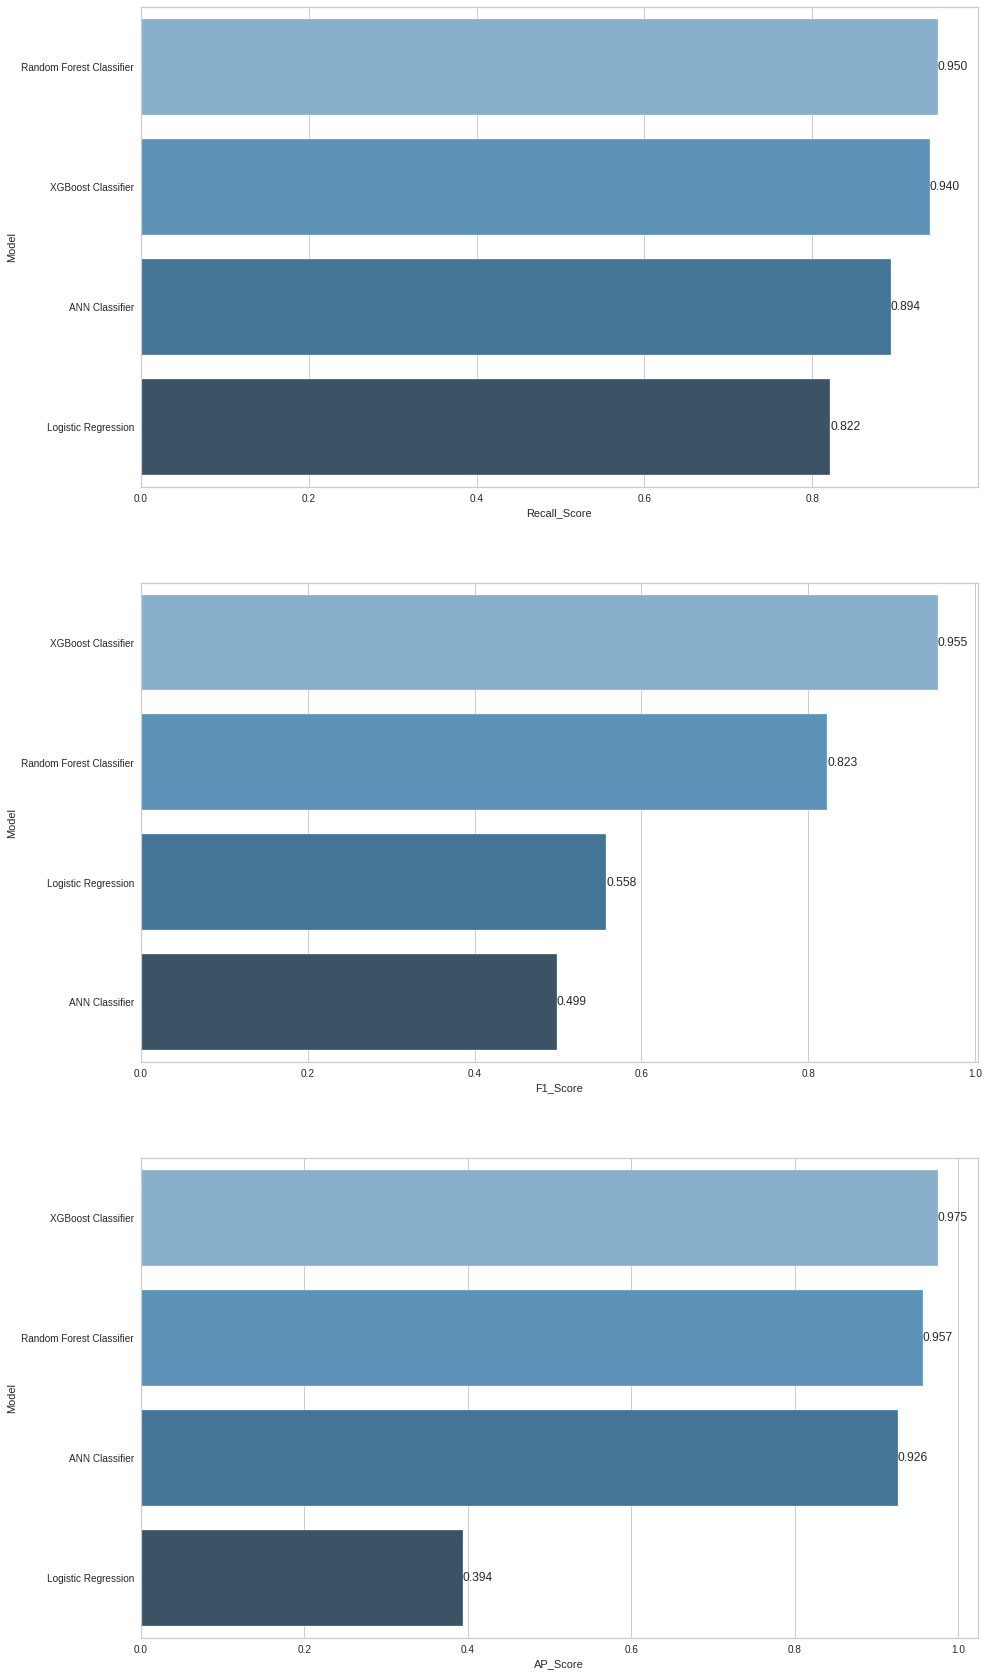

In [ ]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(313)
compare = compare.sort_values(by="AP_Score", ascending=False)
ax=sns.barplot(x="AP_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model

In [ ]:
import joblib

### Save and Export Variables


In [ ]:
joblib.dump(model_xgb_tuned, open('/content/drive/MyDrive/projects/2-employee_churn_prediction/model_xgb_tuned.pkl', 'wb'))

In [ ]:
'''import pickle
pickle.dump(model_xgb_tuned, open('model_xgb_tuned2.pkl', 'wb'))'''

In [ ]:
# sample prediction
model_xgb_g6 = joblib.load(open('/content/drive/MyDrive/projects/2-employee_churn_prediction/model_xgb_tuned.pkl', 'rb'))

In [ ]:
#model_xgb_tuned.save_model('model_xgb_tuned3.h5')

In [ ]:
my_dict = {
        'satisfaction_level': 0.42,
        'last_evaluation': 0.64,
        'number_project': 3,
        'average_montly_hours': 174,
        'time_spend_company': 2,
        'work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'sales',
        'salary': 0
}

In [ ]:
sample = pd.DataFrame([my_dict], index=[0])
sample

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,departments,salary
0,0.42,0.64,3,174,2,0,0,sales,0


In [ ]:
model_xgb_g6.predict(sample)

array([0])

# Prediction with Widgets

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,11991.00,11991.00,11991.00,11991.00,11991.00,11991.00,11991.00,11991.00
mean,0.63,0.72,3.80,200.47,3.36,0.15,0.17,0.02
std,0.24,0.17,1.16,48.73,1.33,0.36,0.37,0.13
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.48,0.57,3.00,157.00,3.00,0.00,0.00,0.00
50%,0.66,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.86,5.00,243.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [ ]:
satisfaction_level_widget = widgets.FloatSlider(value=0.610, min=0.09, max=1, step=0.01, description='Satisfaction_Level:')
last_evaluation_widget = widgets.FloatSlider(value=0.710, min=0.360, max=1, step=0.01, description='Last_Evaluation:')
number_project_widget = widgets.IntSlider(value=4, min=2, max=7, step=1, description='Number_Project:')
average_montly_hours_widget = widgets.IntSlider(value=201, min=96, max=310, step=1, description='Average_Montly_Hours:')
time_spend_company_widget = widgets.IntSlider(value=4, min=2, max=10, step=1, description='Time_Spend_Company:')
work_accident_widget = widgets.ToggleButtons(options=[0, 1], description='Work_accident:')
promotion_last_5years_widget = widgets.ToggleButtons(options=[0, 1], description='Promotion_Last_5years:')
departments_widget = widgets.Dropdown(options=['support','sales','hr','marketing','technical','management','IT','product_mng',
                                               'RandD','accounting'], description='Departments:')
salary_widget = widgets.ToggleButtons(options=[0, 1, 2], description='Salary:')

In [ ]:
predict_btn = widgets.Button(
    description='Predict'
)
prediction_out = widgets.Output()
def make_prediction(btn):
    x = pd.DataFrame({
        'satisfaction_level': satisfaction_level_widget.value,
        'last_evaluation': last_evaluation_widget.value,
        'number_project': number_project_widget.value,
        'average_montly_hours': average_montly_hours_widget.value,
        'time_spend_company': time_spend_company_widget.value,
        'work_accident': work_accident_widget.value,
        'promotion_last_5years': promotion_last_5years_widget.value,
        'departments': departments_widget.value,
        'salary': salary_widget.value
    }, index=[0])
    # sample prediction
    model_xgb_g6 = joblib.load(open('/content/drive/MyDrive/projects/2-employee_churn_prediction/model_xgb_tuned.pkl', 'rb'))
    prediction = model_xgb_g6.predict(x)
    with prediction_out:
        prediction_out.clear_output()
        if prediction[0] == 0:
            print('Prediction: ', prediction[0], '(stayed)')
        else:
            print('Prediction: ', prediction[0], '(left)')
predict_btn.on_click(make_prediction)
display(satisfaction_level_widget, last_evaluation_widget, number_project_widget, average_montly_hours_widget,
        time_spend_company_widget, work_accident_widget, promotion_last_5years_widget, departments_widget,
        salary_widget, predict_btn, prediction_out)

FloatSlider(value=0.61, description='Satisfaction_Level:', max=1.0, min=0.09, step=0.01)

FloatSlider(value=0.71, description='Last_Evaluation:', max=1.0, min=0.36, step=0.01)

IntSlider(value=4, description='Number_Project:', max=7, min=2)

IntSlider(value=201, description='Average_Montly_Hours:', max=310, min=96)

IntSlider(value=4, description='Time_Spend_Company:', max=10, min=2)

ToggleButtons(description='Work_accident:', options=(0, 1), value=0)

ToggleButtons(description='Promotion_Last_5years:', options=(0, 1), value=0)

Dropdown(description='Departments:', options=('support', 'sales', 'hr', 'marketing', 'technical', 'management'…

ToggleButtons(description='Salary:', options=(0, 1, 2), value=0)

Button(description='Predict', style=ButtonStyle())

Output()